<h1>Text Summarisation</h1>

In [17]:
import requests

url_base = "https://raw.githubusercontent.com/mlinsights/freemium/refs/heads/main/datasets/text-analysis/globalisation/"
url = url_base+"globalisation.txt"
response = requests.get(url)#get from the web
text = response.text
print(text)

Globalization is the process of increasing interdependence and integration among the economies, markets, societies, and cultures of different countries worldwide. This is made possible by the reduction of barriers to international trade, the liberalization of capital movements, the development of transportation, and the advancement of information and communication technologies.[1] The term globalization first appeared in the early 20th century (supplanting an earlier French term mondialisation), developed its current meaning sometime in the second half of the 20th century, and came into popular use in the 1990s to describe the unprecedented international connectivity of the post–Cold War world.[2] The origins of globalization can be traced back to the 18th and 19th centuries, driven by advances in transportation and communication technologies. These developments increased global interactions, fostering the growth of international trade and the exchange of ideas, beliefs, and cultures. 

In [18]:
import re  #library for regular expression 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def text_preprocess(text):
    pattern = r'[^a-zA-Z\s]' #find unwanted characters (non-alphanumeric and non-whitespace)
    text = text.lower()#put to lower case
    clean_text = re.sub(pattern, '', text)#replace them with an empty string    
    tokens = word_tokenize(clean_text)#fetch tokens
    eng_stopwords = stopwords.words('english')#get list of stopwords in english
    eng_stopwords.append('th') #add user aware additional stop words
    tokens_stops_removed = [word for word in tokens if word not in eng_stopwords]#remove stop words from list
    text_clean = " ".join(tokens_stops_removed)    
    return text_clean
    

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#preprocess input text
clean_text = text_preprocess(text)
# create count vectorizer
cvz = CountVectorizer()
# get token counts
result_cvz = cvz.fit_transform([clean_text])
#get feature list
feature_list = cvz.get_feature_names_out()
#get tokens count
tf_array = result_cvz.toarray()[0]

#tf dataframe
tf = pd.DataFrame({'term':feature_list, 'freq':tf_array})
tf.sort_values(by=['freq'],inplace=True,ascending=False)
tf.reset_index(drop=True, inplace=True)

tf.head()

,term,freq
0,globalization,16
1,economic,6
2,international,5
3,global,5
4,trade,5


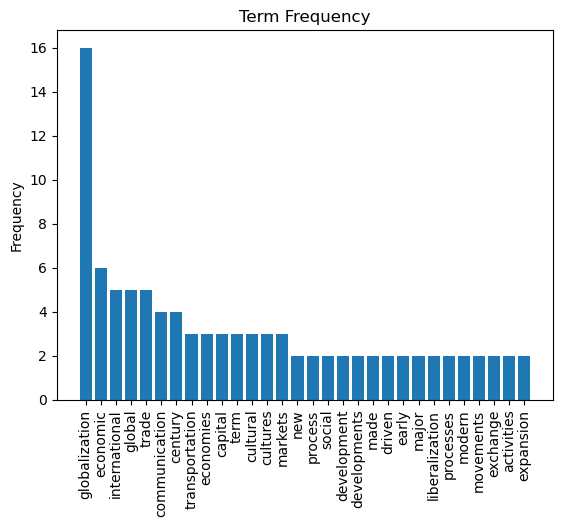

In [20]:
import matplotlib.pyplot as plt
top_n = 30

plt.figure()
plt.bar(tf.term[0:top_n], tf.freq[0:top_n])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Term Frequency')
plt.show()

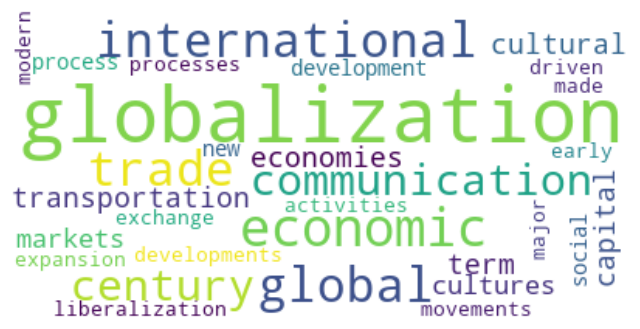

In [21]:
from wordcloud import WordCloud 

word_freq = {} 
num_terms = len(tf) 
for i in range(num_terms): 
    freq = tf.iloc[i,1] 
    term = tf.iloc[i,0] 
    word_freq[term] = freq 

wordcloud  = WordCloud(max_font_size=50,  
                          max_words=top_n, background_color="white").generate_from_frequencies(word_freq) 

plt.figure(figsize = (8,8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.show() 

In [22]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import numpy as np

vocabulary = np.unique(word_tokenize(clean_text)).tolist()#fetch bag of words
corpus = []
#corpus
for i in range(5):
    url = url_base+"corpus/corpus_%d.txt"%(i+1)
    response = requests.get(url)#get from the web
    corpus_i = response.text
    corpus.append(corpus_i)
#add document into the corpus
corpus.append(clean_text)

# create object
tfidf = TfidfVectorizer(vocabulary=vocabulary)
# get tf-df values
result_tfidf = tfidf.fit_transform(corpus)
#get feature list
feature_list = tfidf.get_feature_names_out()

In [23]:
#get the TFIDF of the last document
tfidf_array = result_tfidf[-1].toarray()[0]

#tf dataframe
tfidf = pd.DataFrame({'term':feature_list, 'freq':tfidf_array})
tfidf.sort_values(by=['freq'],inplace=True,ascending=False)
tfidf.reset_index(drop=True, inplace=True)

tfidf.head()

,term,freq
0,globalization,0.613343
1,international,0.191670
2,global,0.191670
3,economic,0.188606
4,trade,0.157172


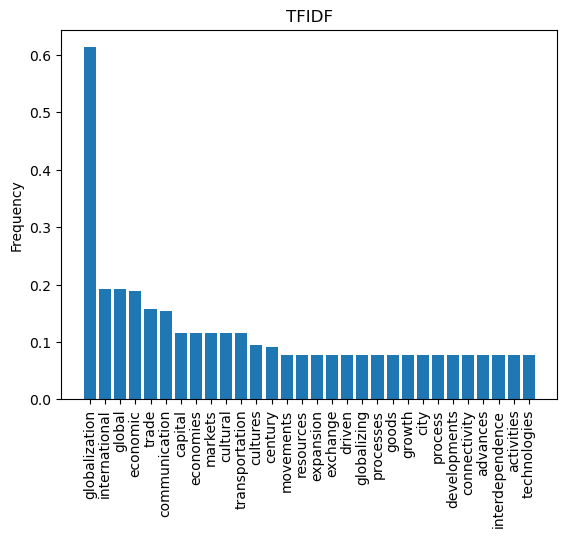

In [24]:
import matplotlib.pyplot as plt
top_n = 30

plt.figure()
plt.bar(tfidf.term[0:top_n], tfidf.freq[0:top_n])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('TFIDF')
plt.show()

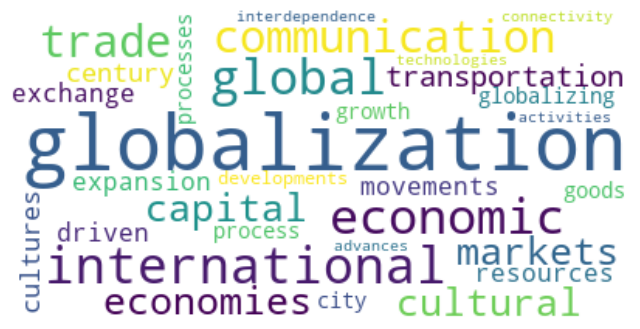

In [25]:
from wordcloud import WordCloud 

word_freq = {} 
num_terms = len(tfidf) 
for i in range(num_terms): 
    freq = tfidf.iloc[i,1] #read data from the TFIDF matrix
    term = tfidf.iloc[i,0] 
    word_freq[term] = freq 

wordcloud  = WordCloud(max_font_size=50,  
                          max_words=top_n, background_color="white").generate_from_frequencies(word_freq) 

plt.figure(figsize = (8,8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.show() 